
# Scrapy Project Analyzing Zoo Data
## by Connor Haas

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
import csv

In [2]:
#extracting csv file with zoo name and data
zooDF = pd.read_csv(r'C:\Users\conma\Desktop\NYCDSA\Webscraping\ScrapyProject\zoo_data\zoodata.csv')
countryDF = pd.read_csv(r'C:\Users\conma\Desktop\NYCDSA\Webscraping\ScrapyProject\country_data\countrydata.csv')
revenueDF = pd.read_csv(r'C:\Users\conma\Desktop\NYCDSA\Webscraping\ScrapyProject\zoo_data\zoorev.csv')

In [3]:
revenueDF

,EIN,Name,Address,City,State,Zip,Revenue,Unnamed: 7
0,951648219.0,ZOOLOGICAL SOCIETY OF SAN DIEGO,PO BOX 120551,SAN DIEGO,CA,92112-0551,"$294,950,888",NaN
1,131740011.0,WILDLIFE CONSERVATION SOCIETY,2300 SOUTHERN BLVD,BRONX,NY,10460-1068,"$253,680,190",NaN
2,363297716.0,OMAHA ZOO FOUNDATION,3701 S 10TH ST,OMAHA,NE,68107-2299,"$121,645,586",NaN
3,942487469.0,MONTEREY BAY AQUARIUM FOUNDATION,886 CANNERY ROW,MONTEREY,CA,93940-1023,"$100,827,641",NaN
4,362167918.0,SHEDD AQUARIUM SOCIETY,1200 S LAKE SHORE DR,CHICAGO,IL,60605-2402,"$82,931,011",NaN
...,...,...,...,...,...,...,...,...
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
zooDF

,address,city,country,name,name_url,num_animals,num_species,state
0,2070 Zoo Ln,Abilene,United States,Abilene Zoological Gardens,https://en.wikipedia.org/wiki/Abilene_Zoologic...,1100,>250,Texas
1,1 Wild Pl,Birmingham,United States,Birmingham Zoo,https://en.wikipedia.org/wiki/Birmingham_Zoo,~800,200+,Alabama
2,"USCD, 9500 Gilman Dr",La Jolla,United States,Birch Aquarium at Scripps,https://en.wikipedia.org/wiki/Birch_Aquarium,"3,000+",380,California
3,7400 Division Dr,Battle Creek,United States,Binder Park Zoo,https://en.wikipedia.org/wiki/Binder_Park_Zoo,500,140,Michigan
4,PO Box FL 145,Flatts Village,NaN,"Bermuda Aquarium, Museum and Zoo",https://en.wikipedia.org/wiki/Bermuda_Aquarium...,300,NaN,Bermuda
...,...,...,...,...,...,...,...,...
245,23 Science Center Rd,Holderness,United States,Squam Lakes Natural Science Center,https://en.wikipedia.org/wiki/Squam_Lakes_Natu...,NaN,NaN,New Hampshire
246,2300 Southern Blvd,Bronx,United States,Bronx Zoo,https://en.wikipedia.org/wiki/Bronx_Zoo,"4,000 (2010)",650 (2010),New York
247,3414 W St,Eureka,United States,Sequoia Park Zoo,https://en.wikipedia.org/wiki/Sequoia_Park_Zoo,Vertebrates: 195 (in 2013),54 (in 2013),California
248,2222 Saint Paul St.,Rochester,United States,Seneca Park Zoo,https://en.wikipedia.org/wiki/Seneca_Park_Zoo,NaN,NaN,New York


In [5]:
countryDF

,city_2016_land_area,city_name,pop_2018,pop_density,state_name
0,"301.5 sq mi\n,468.7 sq mi\n,227.3 sq mi\n,637....","New York,[d],Los Angeles,Chicago,Houston,[3],P...","8,398,748\n,3,990,456\n,2,705,994\n,2,325,502\...","28,317/sq mi\n,8,484/sq mi\n,11,900/sq mi\n,3,...","New York,\n,California,\n,Illinois,\n,Texas,\n..."
1,"102.3 km,\n,69.9 km,\n,53.6 km,\n,79.5 km,\n,2...","San Juan,Bayamón,Carolina,Ponce,Caguas","395,326\n,208,116\n,176,762\n,166,327\n,142,893\n","3,297/km,\n,2,568/km,\n,2,881/km,\n,1,771/km,\...",NaN
2,"120.996 km,\n,67.288 km,\n,86.381 km,\n,86.055...","Nevada,Virginia,Nevada,Nevada,Louisiana,Califo...","186,070\n,189,453\n,156,120\n,117,390\n,146,13...","1,844/km,\n,3,086/km,\n,2,192/km,\n,2,073/km,\...",NaN
3,"2.30% from 2000 to 2010\n,annexed by , in 1907...","New York,Pennsylvania,New York,New Jersey,Ohio...","(1950)\n, (1900)\n, (1890)\n, (1950)\n, (1950...",NaN,NaN


In [6]:
countryDF2 = pd.DataFrame([])
zooDF2 = pd.DataFrame([])
revenueDF2 = pd.DataFrame([])

In [7]:
#redefine zooDF2 with variable name changes
zooDF2['city_name'] = zooDF['city']
zooDF2['state_name'] = zooDF['state']
zooDF2['zoo_name'] = zooDF['name']
zooDF2['num_animals'] = zooDF['num_animals']
zooDF2['num_species'] = zooDF['num_species']
zooDF2

,city_name,state_name,zoo_name,num_animals,num_species
0,Abilene,Texas,Abilene Zoological Gardens,1100,>250
1,Birmingham,Alabama,Birmingham Zoo,~800,200+
2,La Jolla,California,Birch Aquarium at Scripps,"3,000+",380
3,Battle Creek,Michigan,Binder Park Zoo,500,140
4,Flatts Village,Bermuda,"Bermuda Aquarium, Museum and Zoo",300,NaN
...,...,...,...,...,...
245,Holderness,New Hampshire,Squam Lakes Natural Science Center,NaN,NaN
246,Bronx,New York,Bronx Zoo,"4,000 (2010)",650 (2010)
247,Eureka,California,Sequoia Park Zoo,Vertebrates: 195 (in 2013),54 (in 2013)
248,Rochester,New York,Seneca Park Zoo,NaN,NaN


In [8]:
numSpec = zooDF2['num_species']
numSpec = numSpec.replace(r'\([^)]*\)',"",regex=True)
numSpec = numSpec.replace('[^0-9.]',"",regex=True)
zooDF2['num_species'] = numSpec

In [9]:
numAni = zooDF2['num_animals']
numAni = numAni.replace(r'\([^)]*\)',"",regex=True)
numAni = numAni.replace('[^0-9.]',"",regex=True)
zooDF2['num_animals'] = numAni
zooDF2

,city_name,state_name,zoo_name,num_animals,num_species
0,Abilene,Texas,Abilene Zoological Gardens,1100,250
1,Birmingham,Alabama,Birmingham Zoo,800,200
2,La Jolla,California,Birch Aquarium at Scripps,3000,380
3,Battle Creek,Michigan,Binder Park Zoo,500,140
4,Flatts Village,Bermuda,"Bermuda Aquarium, Museum and Zoo",300,NaN
...,...,...,...,...,...
245,Holderness,New Hampshire,Squam Lakes Natural Science Center,NaN,NaN
246,Bronx,New York,Bronx Zoo,4000,650
247,Eureka,California,Sequoia Park Zoo,195,54
248,Rochester,New York,Seneca Park Zoo,NaN,NaN


In [10]:
#split landArea string and clean into dataframe
landArea = countryDF.loc[0,'city_2016_land_area'].split('\n')
#print("landArea", type(landArea))
landArea = list(map(lambda s: re.sub('[^0-9.]','',s),landArea))
landArea = list(map(lambda s: float(s),landArea[:-1]))
countryDF2['land_area'] = np.array(landArea)

#split city names string and clean into dataframe
city_name = countryDF.loc[0,'city_name'].split(',')
for e in city_name:
    if '[' in e:
        city_name.remove(e)
#np.array(city_name).size
countryDF2['city_name'] = np.array(city_name)

#split population of city and clean into dataframe
pop_2018 = countryDF.replace(',','',regex=True).loc[0,'pop_2018'].split('\n')
pop_2018 = list(map(lambda s: int(s),pop_2018[:-1]))
#np.array(pop_2018).size
countryDF2['pop_2018'] = np.array(pop_2018)

#split population denisty of city and clean into dataframe
popD = countryDF.loc[0,'pop_density'].replace(',','').split('\n')
popD = list(map(lambda s: re.sub('[^0-9]','',s),popD))
popD = list(map(lambda s: int(s), popD[:-1]))
#np.array(popD).size
countryDF2['population_density'] = np.array(popD)

#split states and clean into dataframe
state_name = countryDF.loc[0,'state_name'].split('\n')
state_name = list(map(lambda s: re.sub(r'[,_]','',s),state_name[:-1]))
#np.array(state_name).size
countryDF2['state_name']=np.array(state_name)

countryDF2


,land_area,city_name,pop_2018,population_density,state_name
0,301.5,New York,8398748,28317,New York
1,468.7,Los Angeles,3990456,8484,California
2,227.3,Chicago,2705994,11900,Illinois
3,637.5,Houston,2325502,3613,Texas
4,517.6,Phoenix,1660272,3120,Arizona
...,...,...,...,...,...
309,30.1,Edison,100693,3389,New Jersey
310,23.3,Woodbridge,100450,4351,New Jersey
311,59.9,San Angelo,100215,1681,Texas
312,28.0,Kenosha,100164,3577,Wisconsin


In [11]:
zooDF3 = zooDF2.merge(countryDF2,how = 'left', on = 'city_name')
zooDF3

,city_name,state_name_x,zoo_name,num_animals,num_species,land_area,pop_2018,population_density,state_name_y
0,Abilene,Texas,Abilene Zoological Gardens,1100,250,106.7,122999.0,1146.0,Texas
1,Birmingham,Alabama,Birmingham Zoo,800,200,146.1,209880.0,1452.0,Alabama
2,La Jolla,California,Birch Aquarium at Scripps,3000,380,NaN,NaN,NaN,NaN
3,Battle Creek,Michigan,Binder Park Zoo,500,140,NaN,NaN,NaN,NaN
4,Flatts Village,Bermuda,"Bermuda Aquarium, Museum and Zoo",300,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
254,Bronx,New York,Bronx Zoo,4000,650,NaN,NaN,NaN,NaN
255,Eureka,California,Sequoia Park Zoo,195,54,NaN,NaN,NaN,NaN
256,Rochester,New York,Seneca Park Zoo,NaN,NaN,35.8,206284.0,5835.0,New York
257,Rochester,New York,Seneca Park Zoo,NaN,NaN,54.6,116961.0,2088.0,Minnesota


In [12]:
#redefine a new dataframe with less data
revenueDF2['rev'] = revenueDF['Revenue']
revenueDF2['city_name'] = revenueDF['City']
revenueDF2['zoo_name'] = revenueDF['Name']
rev = revenueDF2['rev']
rev = rev.replace('[^0-9.]',"",regex=True)
revenueDF2['rev'] = rev

In [13]:
bool_mask = revenueDF2["city_name"].isnull()
revenueDF2.loc[bool_mask, "city_name"] = ""

In [14]:
revenueDF2["city_name"] = pd.Series(list(map(lambda x: x.lower(), revenueDF2["city_name"])))

In [15]:
revenueDF2

,rev,city_name,zoo_name
0,294950888,san diego,ZOOLOGICAL SOCIETY OF SAN DIEGO
1,253680190,bronx,WILDLIFE CONSERVATION SOCIETY
2,121645586,omaha,OMAHA ZOO FOUNDATION
3,100827641,monterey,MONTEREY BAY AQUARIUM FOUNDATION
4,82931011,chicago,SHEDD AQUARIUM SOCIETY
...,...,...,...
808,NaN,,NaN
809,NaN,,NaN
810,NaN,,NaN
811,NaN,,NaN


In [16]:
zooDF3['city_name'] = pd.DataFrame(list(map(lambda x: x.lower(), zooDF3.loc[:,'city_name'])))
zooDF3

,city_name,state_name_x,zoo_name,num_animals,num_species,land_area,pop_2018,population_density,state_name_y
0,abilene,Texas,Abilene Zoological Gardens,1100,250,106.7,122999.0,1146.0,Texas
1,birmingham,Alabama,Birmingham Zoo,800,200,146.1,209880.0,1452.0,Alabama
2,la jolla,California,Birch Aquarium at Scripps,3000,380,NaN,NaN,NaN,NaN
3,battle creek,Michigan,Binder Park Zoo,500,140,NaN,NaN,NaN,NaN
4,flatts village,Bermuda,"Bermuda Aquarium, Museum and Zoo",300,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
254,bronx,New York,Bronx Zoo,4000,650,NaN,NaN,NaN,NaN
255,eureka,California,Sequoia Park Zoo,195,54,NaN,NaN,NaN,NaN
256,rochester,New York,Seneca Park Zoo,NaN,NaN,35.8,206284.0,5835.0,New York
257,rochester,New York,Seneca Park Zoo,NaN,NaN,54.6,116961.0,2088.0,Minnesota


In [17]:
zooDF4 = zooDF3.merge(revenueDF2, how='left', on= 'city_name')
zooDF4

,city_name,state_name_x,zoo_name_x,num_animals,num_species,land_area,pop_2018,population_density,state_name_y,rev,zoo_name_y
0,abilene,Texas,Abilene Zoological Gardens,1100,250,106.7,122999.0,1146.0,Texas,1695678,ABILENE ZOOLOGICAL SOCIETY
1,abilene,Texas,Abilene Zoological Gardens,1100,250,106.7,122999.0,1146.0,Texas,897910,GROVER NELSON PARK ZOOLOGICAL FOUNDATION
2,birmingham,Alabama,Birmingham Zoo,800,200,146.1,209880.0,1452.0,Alabama,NaN,NaN
3,la jolla,California,Birch Aquarium at Scripps,3000,380,NaN,NaN,NaN,NaN,NaN,NaN
4,battle creek,Michigan,Binder Park Zoo,500,140,NaN,NaN,NaN,NaN,5372611,BINDER PARK ZOOLOGICAL SOCIETY INC
...,...,...,...,...,...,...,...,...,...,...,...
415,rochester,New York,Seneca Park Zoo,NaN,NaN,35.8,206284.0,5835.0,New York,1647,SENECA ZOO SOCIETY DEVELOPMENT FUND INC
416,rochester,New York,Seneca Park Zoo,NaN,NaN,54.6,116961.0,2088.0,Minnesota,5027238,SENECA ZOOLOGICAL SOCIETY
417,rochester,New York,Seneca Park Zoo,NaN,NaN,54.6,116961.0,2088.0,Minnesota,1647,SENECA ZOO SOCIETY DEVELOPMENT FUND INC
418,wichita,Kansas,Sedgwick County Zoo,3000,400,160.4,389255.0,2431.0,Kansas,15161621,SEDGWICK COUNTY ZOOLOGICAL SOCIETY INC


In [18]:
#mask to account for NaN values in my dataset
zooDF5 = zooDF4.copy()
zooDF5 

species_mask = zooDF5["num_species"].isnull()
zooDF5.loc[species_mask, "num_species"] = 0
zooDF5['num_species'] = pd.to_numeric(zooDF5['num_species'])

ani_mask = zooDF5["num_animals"].isnull()
zooDF5.loc[ani_mask,'num_animals'] = 0
zooDF5['num_animals'] = pd.to_numeric(zooDF5['num_animals'])

rev_mask = zooDF5['rev'].isnull()
zooDF5.loc[rev_mask,'rev']=0
zooDF5['rev'] = pd.to_numeric(zooDF5['rev'])

pop_mask = zooDF5["pop_2018"].isnull()
zooDF5.loc[pop_mask,'pop_2018']=0

popD_mask = zooDF5['population_density'].isnull()
zooDF5.loc[popD_mask,'population_density']=0

zooDF5.columns = ['City Name', 'State', 'Zoo Name', 'Number of Animals', 'Number of Species',
       'Area per sq mi', 'Population', 'Population Density', 'State_x', 'Revenue',
       'Zoo Name_x']

zooDF5
# zooDF5.loc[name_mask,'zoo_name_x'].count()
#zoo_plot = zooDF5.copy()

,City Name,State,Zoo Name,Number of Animals,Number of Species,Area per sq mi,Population,Population Density,State_x,Revenue,Zoo Name_x
0,abilene,Texas,Abilene Zoological Gardens,1100.0,250.0,106.7,122999.0,1146.0,Texas,1695678,ABILENE ZOOLOGICAL SOCIETY
1,abilene,Texas,Abilene Zoological Gardens,1100.0,250.0,106.7,122999.0,1146.0,Texas,897910,GROVER NELSON PARK ZOOLOGICAL FOUNDATION
2,birmingham,Alabama,Birmingham Zoo,800.0,200.0,146.1,209880.0,1452.0,Alabama,0,NaN
3,la jolla,California,Birch Aquarium at Scripps,3000.0,380.0,NaN,0.0,0.0,NaN,0,NaN
4,battle creek,Michigan,Binder Park Zoo,500.0,140.0,NaN,0.0,0.0,NaN,5372611,BINDER PARK ZOOLOGICAL SOCIETY INC
...,...,...,...,...,...,...,...,...,...,...,...
415,rochester,New York,Seneca Park Zoo,0.0,0.0,35.8,206284.0,5835.0,New York,1647,SENECA ZOO SOCIETY DEVELOPMENT FUND INC
416,rochester,New York,Seneca Park Zoo,0.0,0.0,54.6,116961.0,2088.0,Minnesota,5027238,SENECA ZOOLOGICAL SOCIETY
417,rochester,New York,Seneca Park Zoo,0.0,0.0,54.6,116961.0,2088.0,Minnesota,1647,SENECA ZOO SOCIETY DEVELOPMENT FUND INC
418,wichita,Kansas,Sedgwick County Zoo,3000.0,400.0,160.4,389255.0,2431.0,Kansas,15161621,SEDGWICK COUNTY ZOOLOGICAL SOCIETY INC


In [19]:
zooDF5.sort_values(['Revenue'],ascending=False).reset_index(drop=True)

,City Name,State,Zoo Name,Number of Animals,Number of Species,Area per sq mi,Population,Population Density,State_x,Revenue,Zoo Name_x
0,san diego,California,San Diego Zoo,3700.0,650.0,325.2,1425976.0,4325.0,California,294950888,ZOOLOGICAL SOCIETY OF SAN DIEGO
1,san diego,California,SeaWorld San Diego,0.0,0.0,325.2,1425976.0,4325.0,California,294950888,ZOOLOGICAL SOCIETY OF SAN DIEGO
2,bronx,New York,Bronx Zoo,4000.0,650.0,NaN,0.0,0.0,NaN,253680190,WILDLIFE CONSERVATION SOCIETY
3,omaha,Nebraska,Omaha's Henry Doorly Zoo,962.0,0.0,133.2,468262.0,3356.0,Nebraska,121645586,OMAHA ZOO FOUNDATION
4,monterey,California,Monterey Bay Aquarium,35000.0,550.0,NaN,0.0,0.0,NaN,100827641,MONTEREY BAY AQUARIUM FOUNDATION
...,...,...,...,...,...,...,...,...,...,...,...
415,toronto,Ontario,Toronto Zoo,5000.0,460.0,NaN,0.0,0.0,NaN,0,NaN
416,asheville,North Carolina,Western North Carolina Nature Center,100.0,0.0,NaN,0.0,0.0,NaN,0,NaN
417,albany,Georgia,Chehaw Park,212.0,55.0,NaN,0.0,0.0,NaN,0,NaN
418,brownsville,Texas,Gladys Porter Zoo,1600.0,400.0,132.5,183392.0,1387.0,Texas,0,DOCENT COUNCIL OF THE GLADYS PORTER ZOO


Text(0.5, 1.0, "Zoo's with highest revenue")

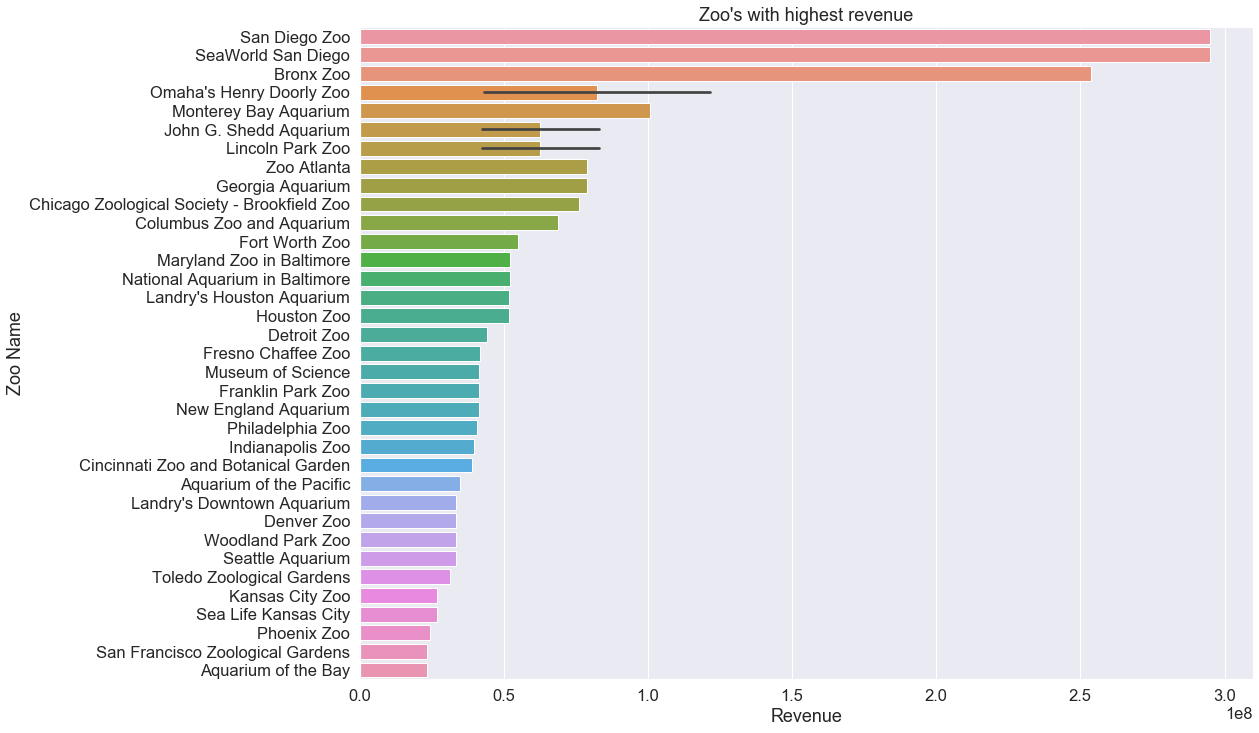

In [20]:
#Highest Revenue
zooDF6 = zooDF5.copy()
zooDF6 = zooDF6.sort_values(['Revenue'],ascending=False).reset_index(drop=True)
sort_ = zooDF6[:40]
plt.figure(figsize=(16,12))
sns.set(font_scale=1.5)
sns.barplot(y=sort_['Zoo Name'], x=sort_['Revenue'], data=sort_).set_title("Zoo's with highest revenue")


Text(0.5, 1.0, 'Ratio of Species to Animal vs. Revenue')

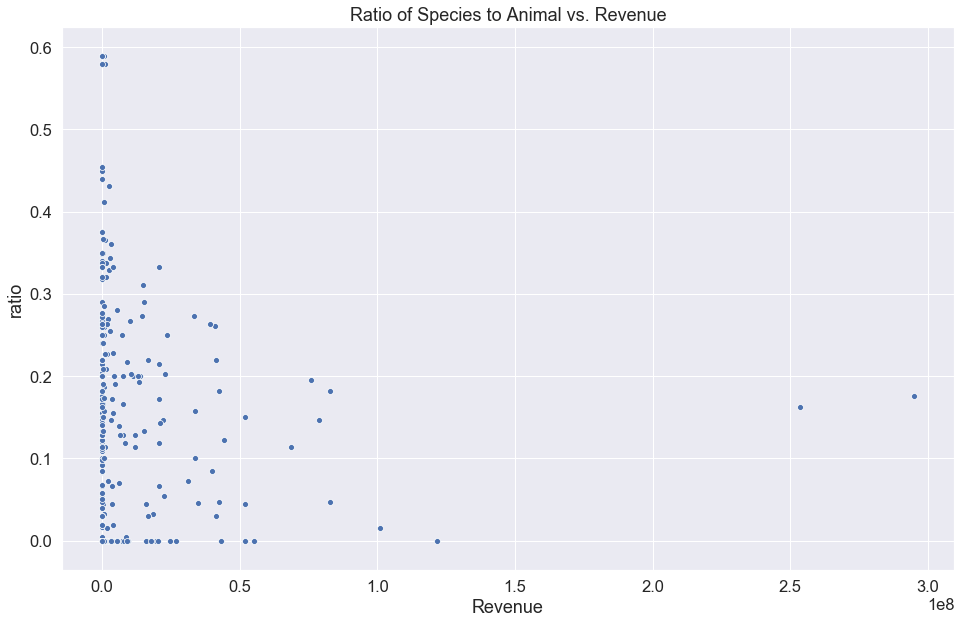

In [22]:
specAniDF = zooDF5.copy()
specAniDF['ratio'] = specAniDF["Number of Species"]/specAniDF['Number of Animals']

plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=specAniDF['Revenue'], y=specAniDF['ratio'], data=specAniDF).set_title("Ratio of Species to Animal vs. Revenue")

Text(0.5, 1.0, 'Animal Count vs. Revenue')

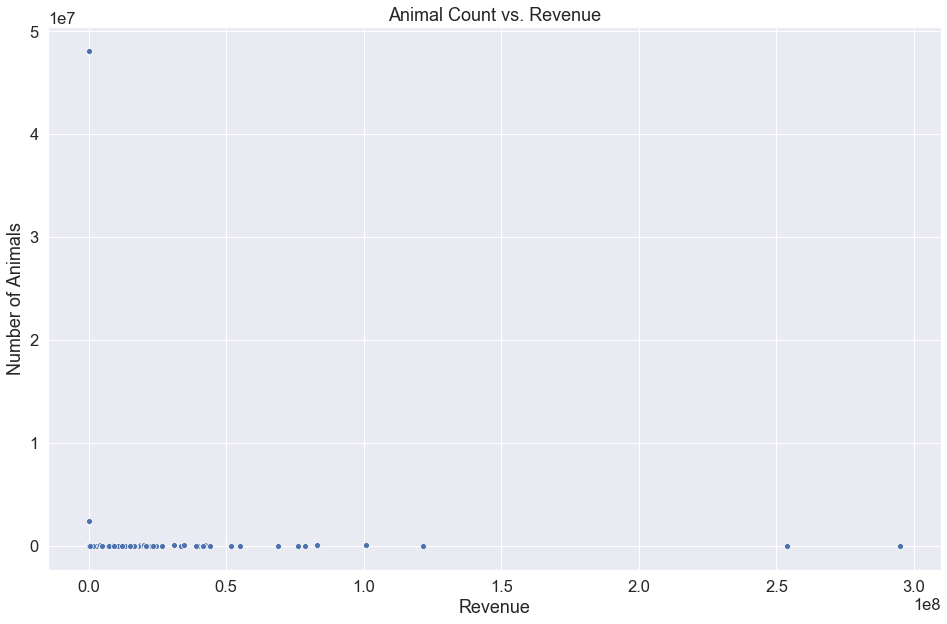

In [23]:
aniRevDF = zooDF5.copy()

plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=aniRevDF['Revenue'], y=aniRevDF['Number of Animals'], data=aniRevDF, ci= None).set_title("Animal Count vs. Revenue")

In [208]:
landArea = countryDF.loc[0,'city_2016_land_area'].split('\n')
landArea = list(map(lambda s: re.sub('[^0-9.]','',s),landArea))
landArea = list(map(lambda s: float(s),landArea[:-1]))
countryDF2['land_area'] = np.array(landArea)
countryDF2

,city_name,pop_2018,Population_Density,land_area
0,New York,8398748,28317,301.5
1,Los Angeles,3990456,8484,468.7
2,Chicago,2705994,11900,227.3
3,Houston,2325502,3613,637.5
4,Phoenix,1660272,3120,517.6
...,...,...,...,...
309,Edison,100693,3389,30.1
310,Woodbridge,100450,4351,23.3
311,San Angelo,100215,1681,59.9
312,Kenosha,100164,3577,28.0


In [192]:
city_name = countryDF.loc[0,'city_name'].split(',')
for e in city_name:
    if '[' in e:
        city_name.remove(e)
np.array(city_name).size
countryDF2['city_name'] = np.array(city_name)
countryDF2

,city_name
0,New York
1,Los Angeles
2,Chicago
3,Houston
4,Phoenix
...,...
309,Edison
310,Woodbridge
311,San Angelo
312,Kenosha


In [193]:
pop_2018 = countryDF.replace(',','',regex=True).loc[0,'pop_2018'].split('\n')
pop_2018 = list(map(lambda s: int(s),pop_2018[:-1]))
np.array(pop_2018).size
countryDF2['pop_2018'] = np.array(pop_2018)
countryDF2

,city_name,pop_2018
0,New York,8398748
1,Los Angeles,3990456
2,Chicago,2705994
3,Houston,2325502
4,Phoenix,1660272
...,...,...
309,Edison,100693
310,Woodbridge,100450
311,San Angelo,100215
312,Kenosha,100164


In [194]:
popD = countryDF.loc[0,'pop_density'].replace(',','').split('\n')
popD = list(map(lambda s: re.sub('[^0-9]','',s),popD))
popD = list(map(lambda s: int(s), popD[:-1]))
np.array(popD).size
countryDF2['Population_Density'] = np.array(popD)
countryDF2

,city_name,pop_2018,Population_Density
0,New York,8398748,28317
1,Los Angeles,3990456,8484
2,Chicago,2705994,11900
3,Houston,2325502,3613
4,Phoenix,1660272,3120
...,...,...,...
309,Edison,100693,3389
310,Woodbridge,100450,4351
311,San Angelo,100215,1681
312,Kenosha,100164,3577


In [21]:
state_name = countryDF.loc[0,'state_name'].split('\n')
state_name = list(map(lambda s: re.sub(r'[,_]','',s),state_name[:-1]))
np.array(state_name).size
countryDF2['state_name']=np.array(state_name)